**Section A: Data Preparation**

*1. Load the dataset, Clean the dataset and Save to CSV for analysis*

In [15]:
import pandas as pd

# Load the Excel dataset
file_path = '/content/Market Basket Analysis Data For Students 2025 (1).xlsx'  # Replace with your actual filename
df = pd.read_excel(file_path)

# Assign column names for clarity
# Removed the line that caused the error: df.columns = columns

# Define the list of product columns you want to keep
product_cols = ['citrus fruit','semi-finished bread','tropical fruit','meat spreads','root vegetables', 'frozen dessert','margarine', 'ready soups', 'sweet spreads', 'salty snack', 'waffles']
# Keep only 'CustomerID' and the specified product columns
# This selects the desired columns and implicitly uses their original names.
# If you needed to rename them, you would do it after selecting them.
df_clean = df[['CustomerID'] + product_cols]

# Replace "T" with 1 and "F" with 0 in the entire DataFrame
df_clean.replace({"T": 1, "F": 0}, inplace=True)


columns_to_convert = ["citrus fruit", "semi-finished bread", "tropical fruit", "meat spreads",
                      "root vegetables", "frozen dessert", "margarine", "ready soups",
                      "sweet spreads", "salty snack", "waffles"]
df_clean[columns_to_convert] = df_clean[columns_to_convert].replace({"T": 1, "F": 0})



# Save to CSV for analysis
df_clean.to_csv('cleaned_grocery_data.csv', index=False)

# View the first few rows of the cleaned DataFrame
print(df_clean.head()) # Changed to print df_clean to see the result of the cleaning

# The subsequent code to find product_columns dynamically is redundant after
# defining product_cols explicitly above, but can be kept if needed for other purposes.
# product_columns = [col for col in df.columns if col != 'CustomerID']
# df_clean = df[['CustomerID'] + product_columns] # This line would overwrite the previous df_clean

  CustomerID  citrus fruit  semi-finished bread  tropical fruit  meat spreads  \
0     CUST01             0                    1               1             0   
1     CUST02             0                    1               0             0   
2     CUST03             0                    0               0             1   
3     CUST04             0                    0               1             0   
4     CUST05             0                    0               0             0   

   root vegetables  frozen dessert  margarine  ready soups  sweet spreads  \
0                0               0          0            0              0   
1                0               0          0            0              0   
2                0               1          1            0              0   
3                0               0          0            1              0   
4                0               0          0            0              0   

   salty snack  waffles  
0            0        0 

<ipython-input-15-dddcc82076ad>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.replace({"T": 1, "F": 0}, inplace=True)
<ipython-input-15-dddcc82076ad>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace({"T": 1, "F": 0}, inplace=True)
<ipython-input-15-dddcc82076ad>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

**Section B: Association Rule Analysis**

*1. Generate association rules*

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd # Import pandas again in this cell

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_grocery_data.csv')

# Define product_columns again as it was defined in the previous cell and might not be available here
# Alternatively, ensure product_columns is defined before this cell runs
product_columns = ['citrus fruit','semi-finished bread','tropical fruit','meat spreads','root vegetables', 'frozen dessert','margarine', 'ready soups', 'sweet spreads', 'salty snack', 'waffles']


# Generate frequent itemsets
# Make sure to exclude 'CustomerID' from the columns used for apriori
df_encoded = df.drop('CustomerID', axis=1)
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

# Sort rules by confidence
rules = rules.sort_values('confidence', ascending=False)

# Display the first few rules
print(rules.head())

                       antecedents       consequents  antecedent support  \
14       (margarine, meat spreads)  (frozen dessert)            0.105098   
13  (frozen dessert, meat spreads)       (margarine)            0.108874   
12     (frozen dessert, margarine)    (meat spreads)            0.110132   
5                   (meat spreads)  (frozen dessert)            0.191315   
7                   (meat spreads)       (margarine)            0.191315   

    consequent support   support  confidence      lift  representativity  \
14            0.232222  0.091882    0.874251  3.764731               1.0   
13            0.207048  0.091882    0.843931  4.076005               1.0   
12            0.191315  0.091882    0.834286  4.360789               1.0   
5             0.232222  0.108874    0.569079  2.450587               1.0   
7             0.207048  0.105098    0.549342  2.653205               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
14  0.06747

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


*3. Interpret top rules*

In [17]:
# Display top 5 rules
top_rules = rules.head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                       antecedents       consequents   support  confidence  \
14       (margarine, meat spreads)  (frozen dessert)  0.091882    0.874251   
13  (frozen dessert, meat spreads)       (margarine)  0.091882    0.843931   
12     (frozen dessert, margarine)    (meat spreads)  0.091882    0.834286   
5                   (meat spreads)  (frozen dessert)  0.108874    0.569079   
7                   (meat spreads)       (margarine)  0.105098    0.549342   

        lift  
14  3.764731  
13  4.076005  
12  4.360789  
5   2.450587  
7   2.653205  


The data presents association rules derived from transaction data, showing how different products are related in purchase patterns. Here's an interpretation of each component:

**Definitions:**
- **Antecedents:** The initial set of products in the rule (the "if" part).
- **Consequents:** The products that tend to be purchased together with the antecedents (the "then" part).
- **Support:** The proportion of transactions that contain both antecedents and consequents. It indicates how frequently this combination occurs.
- **Confidence:** The likelihood that a transaction containing the antecedents also contains the consequents.
- **Lift:** Measures how much more often the antecedents and consequents occur together than if they were independent. A lift greater than 1 suggests a positive association.

---

### Detailed interpretation:

1. **Rule 14:** _(margarine, meat spreads) → (frozen dessert)_
   - **Support:** 9.19% of transactions include margarine, meat spreads, and a frozen dessert.
   - **Confidence:** 87.43% of transactions with margarine and meat spreads also include a frozen dessert.
   - **Lift:** 3.76, indicating these products are purchased together much more often than by chance. Customers buying margarine and meat spreads are highly likely to also buy frozen desserts.

2. **Rule 13:** _(frozen dessert, meat spreads) → (margarine)_
   - **Support:** 9.19% (same as above).
   - **Confidence:** 84.39% of transactions with frozen dessert and meat spreads also include margarine.
   - **Lift:** 4.08, showing a strong positive association—these three items are frequently purchased together.

3. **Rule 12:** _(frozen dessert, margarine) → (meat spreads)_
   - **Support:** 9.19%.
   - **Confidence:** 83.43% of transactions with frozen dessert and margarine also include meat spreads.
   - **Lift:** 4.36, indicating a very strong association among these three products.

4. **Rule 5:** _(meat spreads) → (frozen dessert)_
   - **Support:** 10.89%, slightly higher than the previous rules.
   - **Confidence:** 56.91%, meaning just over half of transactions with meat spreads also include a frozen dessert.
   - **Lift:** 2.45, showing a positive but weaker association compared to the previous rules.

5. **Rule 7:** _(meat spreads) → (margarine)_
   - **Support:** 10.51%.
   - **Confidence:** 54.93%.
   - **Lift:** 2.65, again indicating a positive association, but less strong than the rules involving frozen desserts.

---

### Summary:
- The strongest associations are among margarine, meat spreads, and frozen desserts, especially when considering the lift values (>3.7), indicating these items are frequently purchased together.
- Customers buying margarine and meat spreads are very likely to also buy frozen desserts.
- While meat spreads alone are somewhat associated with frozen desserts and margarine, the confidence levels are lower, suggesting these are less tightly linked than the three-product combinations.

**Implication:** Retailers might consider bundling or promotions involving these products to encourage combined purchases, especially focusing on the trio of margarine, meat spreads, and frozen desserts due to their strong association.

**Section C: Visualization and Interpretation**

*1. Graph for rules showing antecedents and consequents*

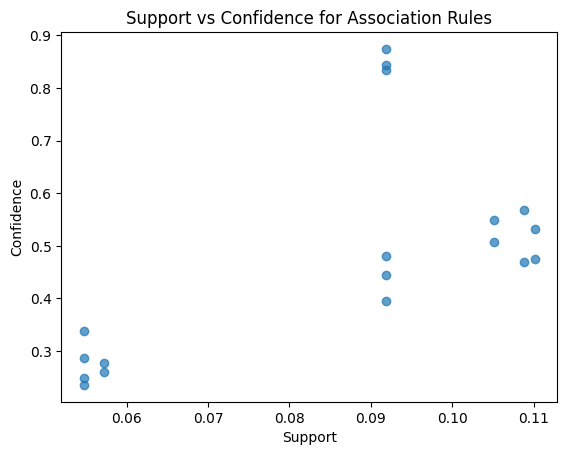

In [18]:
import matplotlib.pyplot as plt

# Plotting support vs confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence for Association Rules')
plt.show()


Interpreting the scatter plot of these association rules involves understanding how the different metrics relate to each other and what they reveal about the relationships between itemsets. Here's a detailed guide:

1. **Axes and Data Points:**
   - **Support (x-axis):** Indicates how frequently the antecedent-consequent pair appears in the dataset.
   - **Confidence (y-axis):** Shows the strength of the rule; the probability that the consequent occurs given the antecedent.
   - **Lift (possibly represented by point size or color):** Measures how much more likely the consequent is to occur with the antecedent compared to random chance. Lift > 1 suggests a positive association.

2. **Key Observations:**
   - All rules have similar support (~9.2% to 10.9%), meaning these itemsets appear with about that frequency.
   - The confidence values are high (around 0.55 to 0.87), indicating that when the antecedent occurs, the consequent is quite likely.
   - Lift values are notably greater than 1 (ranging from about 2.45 to 4.08), suggesting strong positive associations beyond random chance.

3. **Interpreting the Rules:**
   - **High Confidence & Lift:** The rules involving `(margarine, meat spreads)` leading to `(frozen dessert)` and vice versa have high confidence (~0.84 to 0.87) and high lift (~3.76 to 4.08). This indicates a strong, meaningful association; customers buying margarine and meat spreads are quite likely to also buy frozen desserts.
   - **Support Consistency:** All rules share similar support, implying these item combinations are relatively common.

4. **Insights from the Plot:**
   - Rules with higher confidence and lift are more significant and potentially useful for marketing strategies.
   - The plot can help identify which itemsets have the strongest associations (e.g., `(frozen dessert, meat spreads) -> margarine`).

5. **Practical Use:**
   - Focus on rules with high lift and confidence to target cross-promotions.
   - Recognize that some itemsets are strongly associated, guiding product placement or bundling.

**Summary:**
The scatter plot visually highlights the strength and significance of various purchase associations. Rules with high support, confidence, and lift are the most meaningful, indicating strong purchasing patterns that can inform marketing or inventory decisions.

*2. Network graph of most connected products*

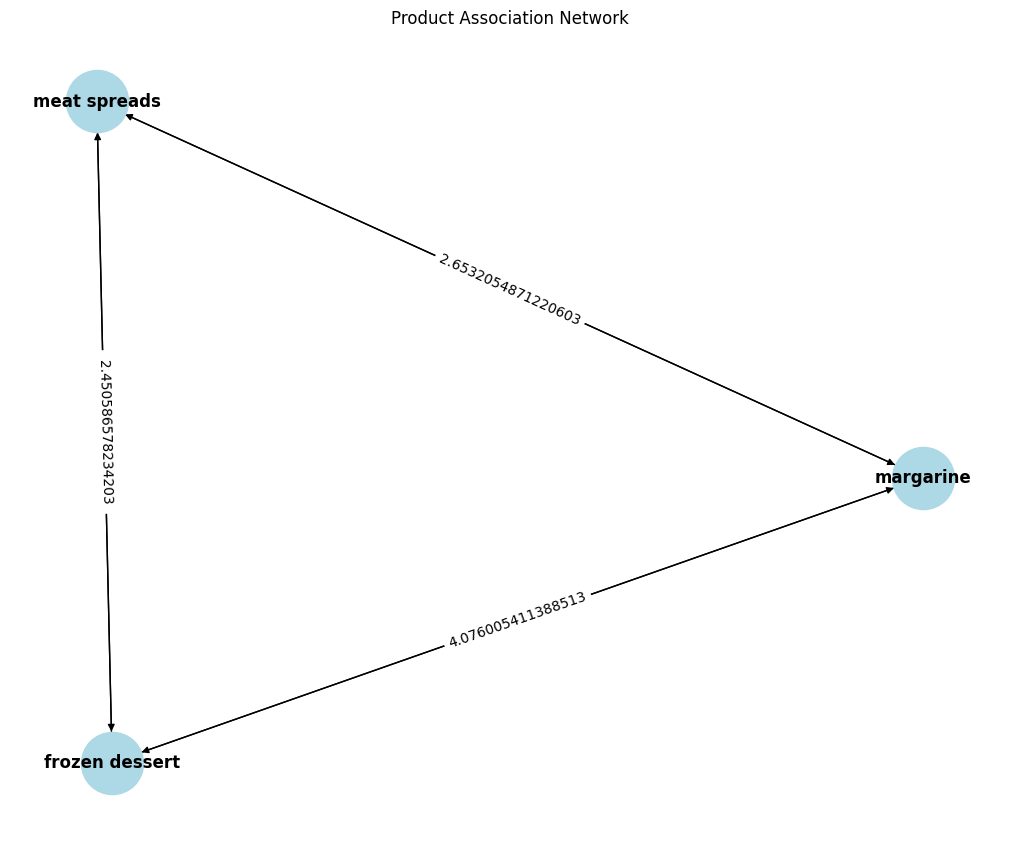

In [19]:
import networkx as nx

# Create graph
G = nx.DiGraph()

# Add edges for top rules
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Draw graph
pos = nx.spring_layout(G, k=2)
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Product Association Network')
plt.show()


Based on the provided association values between product pairs, here is a summary:

1. Meat spreads and margarine: **2.6532**
2. Margarine and frozen dessert: **4.0760**
3. Meat spreads and frozen dessert: **2.4506**

These values likely represent the strength of association or co-occurrence between each pair of products within the network. Higher values suggest a stronger association.

**Insights:**
- Margarine and frozen dessert have the strongest association among the three pairs.
- Meat spreads are more closely associated with margarine than with frozen dessert.
- The relatively lower association between meat spreads and frozen dessert indicates a weaker link compared to the other pairs.

If you need further analysis or visualization suggestions based on these associations, feel free to ask!

**Section D: Marketing Strategy**

1. Product Bundling:
   - Bundle frozen desserts with margarine and meat spreads since these products show strong co-occurrence.
   - Offer discounts or special packages for purchasing these items together to encourage cross-selling.

2. Strategic Product Placement:
   - Place margarine, meat spreads, and frozen desserts near each other in-store to facilitate easy discovery.
   - Use signage to highlight popular combinations, e.g., "Customers buying margarine also purchased frozen desserts."

3. Promotions & Incentives:
   - Create targeted promotions such as "Buy margarine and meat spreads, get 20% off on frozen desserts."
   - Offer loyalty points or coupons for customers who purchase these combinations frequently.

4. In-store Sampling & Displays:
   - Set up tasting stations featuring these products together to stimulate interest.
   - Use shelf talkers that suggest pairing options.

5. Cross-Category Marketing:
   - Use personalized emails or app notifications highlighting these product combos.
   - Recommend bundles during checkout or in digital shopping carts.

6. Seasonal Campaigns:
   - Promote frozen desserts during summer months alongside other relevant items like spreads and margarine.


**Section E: Latent Class Analysis (LCA)**

*Objective: Identify customer segments based on their purchasing patterns, focusing on products involved in the top association rules.*

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume you have the original dataframe loaded as 'df' with CustomerID and product columns

# Step 1: Select products involved in top rules
products_of_interest = [
    'margarine', 'meat spreads', 'frozen dessert'
]

# Step 2: Create subset dataset with CustomerID and these products
lca_df = df[['CustomerID'] + products_of_interest].copy()

# Step 3: Convert True/False to numeric codes
for product in products_of_interest:
    lca_df[product] = lca_df[product].astype(int)

# Step 4: Prepare data for clustering
X = lca_df[products_of_interest].values

# Optional: Standardize data (not always necessary for binary data, but can help)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine 4 clusters (latent classes)
kmeans = KMeans(n_clusters=4, random_state=42)
lca_df['Segment'] = kmeans.fit_predict(X_scaled)

# Step 6: Analyze each segment
segment_summary = lca_df.groupby('Segment')[products_of_interest].mean()

# Step 7: Calculate segment sizes
segment_sizes = lca_df['Segment'].value_counts().sort_index()

# -------------- Output Results ------------------

print("Customer Segments and Purchase Probabilities:\n")
print(segment_summary)

print("\nSegment Sizes:\n")
print(segment_sizes)

# Optional: Map cluster labels to descriptive segments
# For example, based on purchase probabilities:
def describe_segment(row):
    description = []
    for product in products_of_interest:
        prob = row[product]
        if prob > 0.75:
            description.append(f"High purchase of {product}")
        elif prob > 0.25:
            description.append(f"Moderate purchase of {product}")
        else:
            description.append(f"Low purchase of {product}")
    return ', '.join(description)

segment_descriptions = segment_summary.apply(describe_segment, axis=1)
print("\nSegment Descriptions:\n")
for idx, desc in segment_descriptions.items():
    print(f"Segment {idx}: {desc}")


Customer Segments and Purchase Probabilities:

         margarine  meat spreads  frozen dessert
Segment                                         
0         0.000000           1.0        0.197080
1         0.122130           0.0        0.000000
2         1.000000           1.0        0.874251
3         0.147959           0.0        1.000000

Segment Sizes:

Segment
0     137
1    1089
2     167
3     196
Name: count, dtype: int64

Segment Descriptions:

Segment 0: Low purchase of margarine, High purchase of meat spreads, Low purchase of frozen dessert
Segment 1: Low purchase of margarine, Low purchase of meat spreads, Low purchase of frozen dessert
Segment 2: High purchase of margarine, High purchase of meat spreads, High purchase of frozen dessert
Segment 3: Low purchase of margarine, Low purchase of meat spreads, High purchase of frozen dessert


Based on the data provided, here's a comprehensive interpretation of the customer segments and their purchasing behaviors:

**Customer Segments Overview:**
There are four distinct customer segments characterized by their probability of purchasing three product types: margarine, meat spreads, and frozen dessert.

---

### Segment 0
- **Size:** 137 customers
- **Purchase Probabilities:**
  - Margarine: 0.0 (rarely purchased)
  - Meat spreads: 1.0 (always purchased)
  - Frozen dessert: ~19.7% chance
- **Description:** Customers in this segment rarely buy margarine, consistently buy meat spreads, and have a low to moderate chance of purchasing frozen desserts.

---

### Segment 1
- **Size:** 1,089 customers
- **Purchase Probabilities:**
  - Margarine: ~12.2%
  - Meat spreads: 0.0
  - Frozen dessert: 0.0
- **Description:** These customers infrequently buy margarine but do not purchase meat spreads or frozen desserts. They could be occasional margarine buyers.

---

### Segment 2
- **Size:** 167 customers
- **Purchase Probabilities:**
  - Margarine: 100%
  - Meat spreads: 100%
  - Frozen dessert: ~87.4%
- **Description:** The most engaged segment across all products, regularly purchasing margarine, meat spreads, and frozen desserts. These are likely the most active or loyal customers.

---

### Segment 3
- **Size:** 196 customers
- **Purchase Probabilities:**
  - Margarine: ~14.8%
  - Meat spreads: 0.0
  - Frozen dessert: 100%
- **Description:** Customers rarely buy margarine, do not purchase meat spreads, but frequently buy frozen desserts. This segment might prefer frozen desserts over other products.

---

### **Overall Insights:**
- The largest segment (Segment 1) consists of customers with minimal purchasing activity.
- The smallest segment (Segment 2) represents highly engaged customers across all product categories.
- Segments 0 and 3 indicate specialized purchasing patterns, with Segment 0 focused on meat spreads, and Segment 3 on frozen desserts.

### **Business Implications:**
- **Targeted Marketing:** Promotions can be tailored based on segment behaviors:
  - For Segment 2, offer bundled deals across all products.
  - For Segment 3, focus on frozen dessert promotions.
  - For Segment 0, reinforce meat spreads offerings.
- **Customer Engagement:** Identifying and nurturing high-value segments (like Segment 2) could improve overall sales.
- **Product Development:** Understanding why certain segments rarely purchase specific items can guide product placement or new product offerings.

---

If you need further analysis or actionable strategies based on this segmentation, feel free to ask!